In [1]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td
import torchvision as tv
from PIL import Image
import matplotlib.pyplot as plt
from train_transformer import *

In [2]:
def myimshow(image, ax=plt):
    image = image.to('cpu').detach().numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h

In [8]:
image_size = (512, 512)
transform = tv.transforms.Compose([
            tv.transforms.Resize(image_size),
            tv.transforms.ToTensor(),
            tv.transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
            ])
content = Image.open('images/content/amber.jpg').convert('RGB')
content = transform(content)
content = content.reshape((1, 3, image_size[0], image_size[1]))
# content = content.to('cuda')

<IPython.core.display.Javascript object>


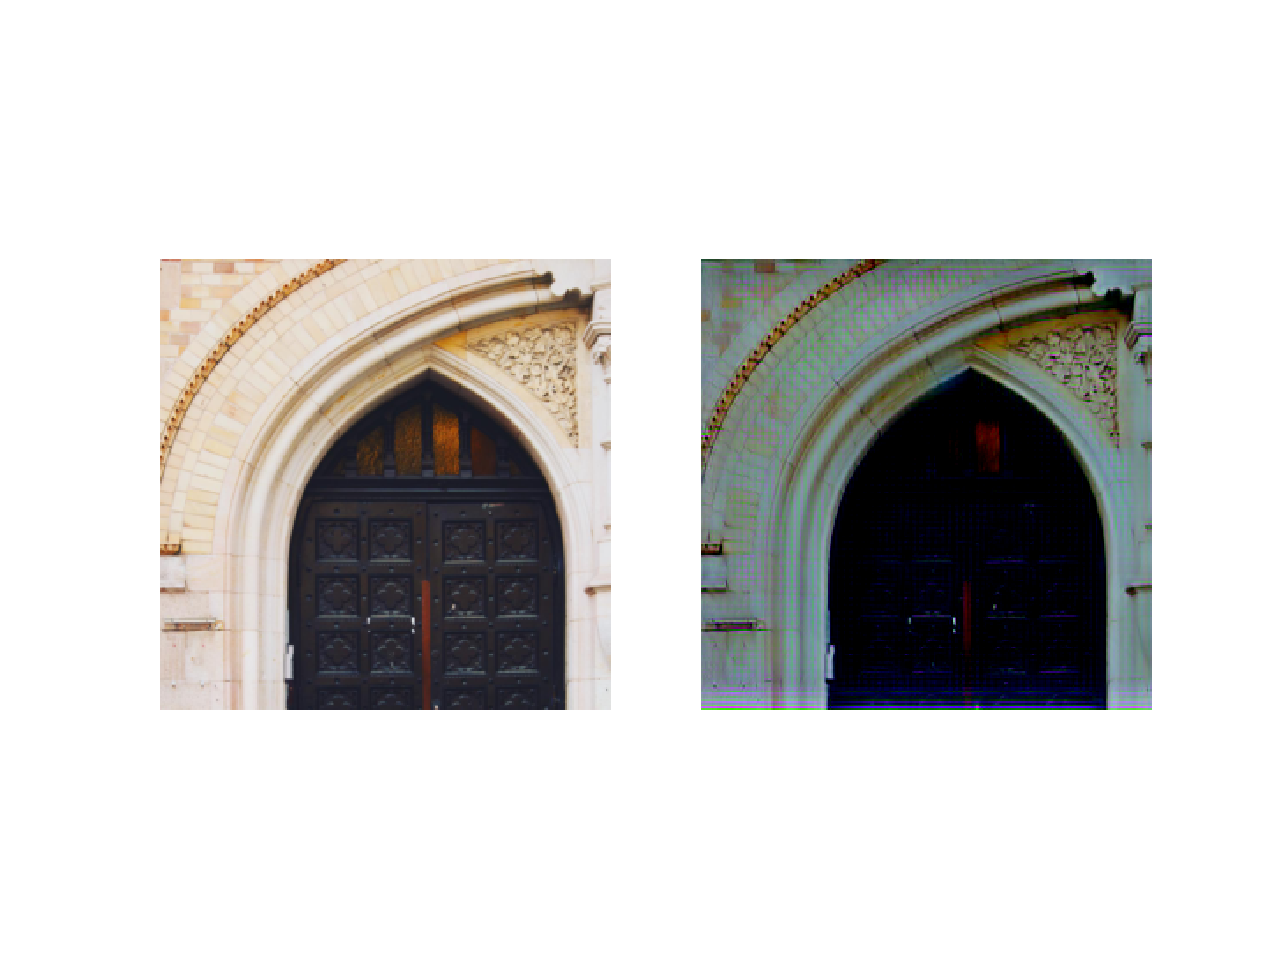

In [25]:
# transformer_picasso = torch.load('models/transformer_picasso')
transformer_picasso = torch.load('models/transformer_picasso', map_location = 'cpu')
img = transformer_picasso.forward(content)
plt.subplot(1, 2, 1)
myimshow(content[0])
plt.subplot(1, 2, 2)
myimshow(img[0])

<IPython.core.display.Javascript object>


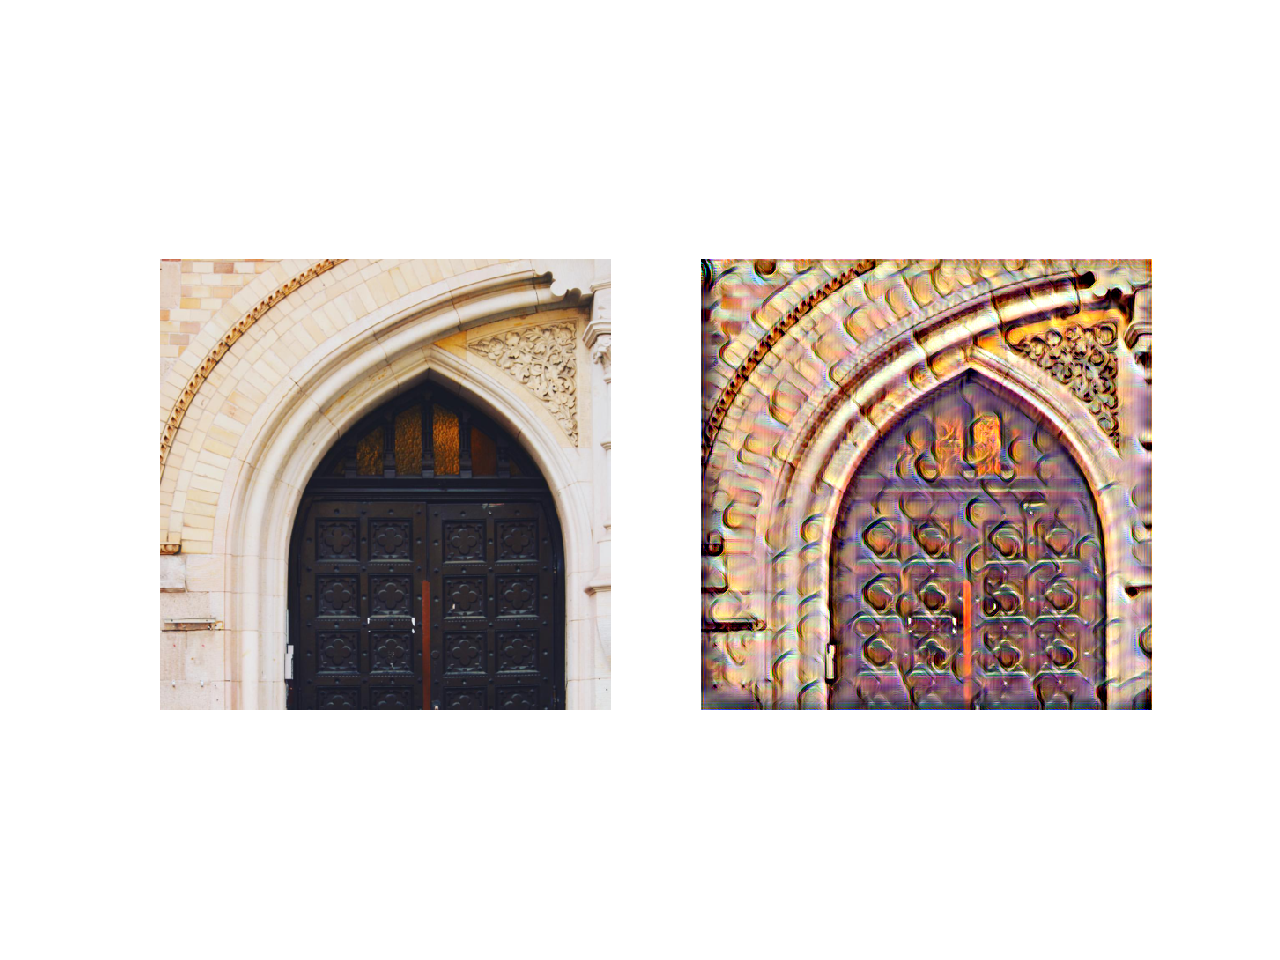

In [9]:
# transformer_candy = torch.load('models/transformer_candy')
transformer_candy = torch.load('models/transformer_candy', map_location = 'cpu')
img = transformer_candy(content)
plt.subplot(1, 2, 1)
myimshow(content[0])
plt.subplot(1, 2, 2)
myimshow(img[0])